<a href="https://colab.research.google.com/github/rashidmeras/EVA-M6/blob/master/EVA_S4_Assignment1_c.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EVA (M6) Session4 Assignment: Proposal3

Objective:

> Using the network defined in Proposal2 explore different techniques and reduce the total number of parameters such that it is not more than 15K and the validation accuracy is above 99.2%.


*So let's Start!!*

Install the keras API library

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


From Keras API library following APIs are needed to create a DNN:

* The sequential API allows to create models layer-by-layer
* The Flatten API flattens the input. Does not affect the batch size.
* The Convolution2D API creates a convolution kernel that is convolved with the layer input.
* The np_utils API is used to convert a class vector (integers) to binary class matrix.
* Finally import the MNSIT dataset from Keras

MNIST has a training set of 60,000 examples, and a test set of 10,000 examples.

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist


Load the the data, shuffled and split between train and test sets.

>The MNIST dataset consists of pair, “handwritten digit image” and “label”. Digit ranges from 0 to 9, meaning 10 patterns in total.

* handwritten digit image (X_train): This is gray scale image with size 28 x 28 pixel.
* label (y_train): This is actual digit number this handwritten digit image represents. It is the numbers between including 0 to 9.

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 15s 1us/step


Matplotlib is a Python 2D plotting library & PyPlot is a shell-like interface to Matplotlib

Display the data in X_train[0] array

(60000, 28, 28)


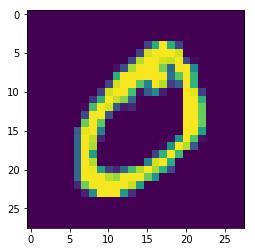

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[1])

Flatten 28x28 images to a 28*28=784 vector for each image.

> The images in the dataset are of 28*28 dimensions which is difficult to accommodate in a simple multilayer neural network. Therefore we need to convert the images into a single dimension where each image contains 784-pixel data using the reshape() function.

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

The pixel values in the images are in the range of 0 - 255 and in this step we reduce this range even further and normalize it between 0 and 1

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

label : This is actual digit number this handwritten digit image represents. It is the numbers between including 0 to 9.

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

Convert class vectors to binary class matrices:

> As we can see from above, the output of y_train is an integer from 0 to 9. We need to perform one-hot encoding of the class labels for getting a vector of class integers into a binary matrix. We need to do this to do a “binarization” of the category and so that we can include it as a feature to train the neural network.

We can use the built in np_utils.to_categorical() helper function in keras to do this.

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

Print the Y_train array after binarization

In [9]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

##Re-analyse Network Type3


![Proposed Network Archtecture](https://rashidmeras.github.io/images/eva/S4_Proposal3_Fig1.png)

The Figure1 above shows the network architecteure that we have established so far. We named this network as Network Type3. We will re-examine this network in this section and explore its characteristics.

As shown in the Figure we can divide this network into different blocks, namely Block1, Block2 and Transitional Block. Layer1-4 can be grouped into Block1, Layer6-9 can be grouped into Block2 and the remaining Max-Pooling layer5 can be called as Tranisitional Block. Also we can see the total number of channels in each layer.

One of the merits of doing this segmentation of the network is that now we can play around with channel size of each block and observe how the network performs. In this *Proposal3*  we will see how changing the channel size in Block1 and Block2 we can redesign the network Type3 and create a new *Network Type4*



##Network Type4


![Proposed Network Archtecture](https://rashidmeras.github.io/images/eva/S4_Proposal3_Fig2.png)


Compared to the *Proposal2* network architecture, following are the changes proposed here in Network Type4:

> 1. At each layer of we perform Convolution followed by Batch Normalization and then Drop-Out as shown in Figure2.
> 2. The channel size are reduced only per block i.e only in Block1

Let's fix a random seed=**990** for reproducibility!

In [0]:
# fix random seed for reproducibility
seed = 990
np.random.seed(seed)

Implement Network Type4:

In [11]:
from keras.layers import Activation
model = Sequential()
 
#Layer1: Cov->BN->DO i/p:|28x28x1|Conv(3x3x1)x8| o/p:|26x26x8|
model.add(Convolution2D(8, 3, 3, activation='relu', use_bias=False, input_shape=(28,28,1))) #26
model.add(BatchNormalization())
model.add(Dropout(0.1))

#Layer2: Cov->BN->DO i/p:|26x26x8|Conv(3x3x8)x4| o/p:|24x24x4|
model.add(Convolution2D(4, 3, 3, activation='relu', use_bias=False)) #24
model.add(BatchNormalization())
model.add(Dropout(0.1))

#Layer3: Cov->BN->DO i/p:|24x24x4|Conv(3x3x4)x4| o/p:|22x22x4|
model.add(Convolution2D(4, 3, 3, activation='relu', use_bias=False)) #22
model.add(BatchNormalization())
model.add(Dropout(0.1))

#Layer4: Cov->BN->DO i/p:|22x22x4|Conv(1x1x4)x3| o/p:|22x22x3|
model.add(Convolution2D(3, 1, 1, activation='relu', use_bias=False)) #22
model.add(BatchNormalization())
model.add(Dropout(0.1))

#Layer5: Max-Pooling layer
model.add(MaxPooling2D(pool_size=(2, 2))) #11

#Layer6: Cov->BN->DO i/p:|11x11x3|Conv(3x3x3)x16| o/p:|9x9x16|
model.add(Convolution2D(16, 3, 3, activation='relu', use_bias=False)) #9
model.add(BatchNormalization())
model.add(Dropout(0.1))

#Layer7: Cov->BN->DO i/p:|9x9x16|Conv(3x3x16)x16| o/p:|7x7x16|
model.add(Convolution2D(16, 3, 3, activation='relu', use_bias=False)) #7
model.add(BatchNormalization())
model.add(Dropout(0.1))

#Layer8: Cov->BN->DO i/p:|7x7x16|Conv(7x7x16)x10| o/p:|1x1x10|
model.add(Convolution2D(10, 7, 7, use_bias=False)) #1
model.add(BatchNormalization())
model.add(Dropout(0.1))

#Layer9: Flatten & activation
model.add(Flatten())
model.add(Activation('softmax'))

#Print model summary
model.summary()

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu", use_bias=False, input_shape=(28, 28, 1...)`
  """


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(4, (3, 3), activation="relu", use_bias=False)`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(4, (3, 3), activation="relu", use_bias=False)`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(3, (1, 1), activation="relu", use_bias=False)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", use_bias=False)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", use_bias=False)`
/usr/loc

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 8)         72        
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 8)         32        
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 4)         288       
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 4)         16        
_________________________________________________________________
dropout_2 (Dropout)          (None, 24, 24, 4)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 4)         144       
__________

Compile the model based on following:

* Optimization method: Here we use 'adam'
* Kind of loss this method will optimize: Here we use 'categorical_crossentropy'

Start training the model:

* Batch size: set to 128
* Epoch: set to 30

In [12]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=128, nb_epoch=30, validation_data=(X_test, Y_test), verbose=1)

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 9s 153us/step - loss: 0.7469 - acc: 0.8044 - val_loss: 0.2977 - val_acc: 0.9640
Epoch 2/30
60000/60000 [==============================] - 6s 97us/step - loss: 0.4217 - acc: 0.8805 - val_loss: 0.1868 - val_acc: 0.9772
Epoch 3/30
60000/60000 [==============================] - 5s 82us/step - loss: 0.3328 - acc: 0.8984 - val_loss: 0.1214 - val_acc: 0.9823
Epoch 4/30
60000/60000 [==============================] - 5s 86us/step - loss: 0.2822 - acc: 0.9120 - val_loss: 0.0967 - val_acc: 0.9844
Epoch 5/30
60000/60000 [==============================] - 6s 93us/step - loss: 0.2549 - acc: 0.9190 - val_loss: 0.0786 - val_acc: 0.9867
Epoch 6/30
60000/60000 [==============================] - 5s 86us/step - loss: 0.2258 - acc: 0.9274 - val_loss: 0.0697 - val_acc: 0.9852
Epoch 7/30
60000/60000 [==============================] - 5s 82us/step - loss: 0.2071 - acc: 0.9331 - val_loss: 0.0561 - val_ac

**Various Channel Size Constraints and the corresponding validation accuracy**

![Channel Size Constarint Types](https://rashidmeras.github.io/images/eva/S4_Proposal3_Table1.png)

The table above shows various channel size constraint in Block1 and Block2 and correspoding Total parameter and validation accuracy. The Row No.4 indicates the performance of **Network Type4** that we have defined in this *Proposal3*. Comapred to other channel size conatraints Row No.4 has total params that is not too high or too low and has an average performance with respect to the vaildation accuracy.




Result:
* Total params: **11,336**
* Trainable params: 11,214
* Non-trainable params: 122

>* Score (validation accuracy): **99.28%** at 29th epoch

Analysis:
> The total number of parameters is **11336** (under 15K) and the validation accuracy is **99.28%** 

###Summary:

> 1. In this section we re-analysed the Proposal2: Network Type3 and categorized it into different blocks. Then we constarined the channels of each blocks by reducing it by 1/2 , 1/4 or keeping it the same. Then we introduced **Network Type4** that has reduced channel sizes by 1/4th only in Block1 (which is above the Transition layer) compared to it's predecessor network.

> 2. The **Network Type4** that we have defined in this section has **11,336** total params and achieves a validation accuracy of **99.28%**. 

> In terms of the total params we have already achieved the target of being under 15K now we need to improvise using new techniques to increase the validation accuracy.


###Thank you!